# 1 An MNIST Classifier With Over 97% Accuracy

* Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
 on the test set. Hint: the KNeighborsClassifier works quite well for this task;
 you just need to find good hyperparameter values (try a grid search on the
 weights and n_neighbors hyperparameters).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
data = mnist.data
target = mnist.target

In [41]:
data.shape

(70000, 784)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
data_trans = pca.fit_transform(data)
X_train = data_trans[:60000]
X_test = data_trans[60000:]
y_train = target[:60000]
y_test = target[60000:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = [
    {'weights': ["uniform", "distance"],'n_neighbors':[3,5]}
]
knn_clf = KNeighborsClassifier()
grid_serach = GridSearchCV(knn_clf, params, cv=3, n_jobs=-1)
grid_serach.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
grid_serach.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [10]:
grid_serach.best_score_

0.974

In [7]:
y_pred = grid_serach.best_estimator_.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.976

In [11]:
def precision_recall(y_test, y_pred, label):
    from sklearn.metrics import precision_score, recall_score
    y_test_label = (y_test == label)
    y_pred_label = (y_pred == label)
    return precision_score(y_test_label, y_pred_label), recall_score(y_test_label, y_pred_label)
for i in range(10):
    precison, recall = precision_recall(y_test, y_pred, i)
    print("classificaiton:", i, "=>precision:", precison, ';recall:', recall)

classificaiton: 0 =>precision: 0.9788519637462235 ;recall: 0.9918367346938776
classificaiton: 1 =>precision: 0.9800347222222222 ;recall: 0.9947136563876652
classificaiton: 2 =>precision: 0.9833333333333333 ;recall: 0.9718992248062015
classificaiton: 3 =>precision: 0.9720837487537388 ;recall: 0.9653465346534653
classificaiton: 4 =>precision: 0.9855670103092784 ;recall: 0.9735234215885947
classificaiton: 5 =>precision: 0.9698324022346368 ;recall: 0.9730941704035875
classificaiton: 6 =>precision: 0.9752832131822863 ;recall: 0.988517745302714
classificaiton: 7 =>precision: 0.9717073170731707 ;recall: 0.9688715953307393
classificaiton: 8 =>precision: 0.9790575916230366 ;recall: 0.9599589322381931
classificaiton: 9 =>precision: 0.9635826771653543 ;recall: 0.9702675916749257


# 2 Data Augmentation
* Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.5 Then, for each image in the training set, create four shifted
copies (one per direction) and add them to the training set. Finally, train your
best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of
artificially growing the training set is called data augmentation or training set
expansion.


In [24]:
X_train = data[:60000]
X_test = data[60000:]
y_train = target[:60000]
y_test = target[60000:]

In [25]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

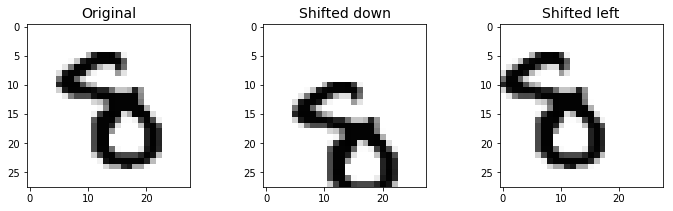

In [49]:
image = X_train[50000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [50]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [51]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]   

In [53]:
knn_clf = KNeighborsClassifier(**grid_serach.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

By simply augmenting the data, we got a 0.5% accuracy boost. :)